# Scraping 

In [7]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
response = requests.get("https://www.imdb.com/list/ls055386972/", headers={"Accept-Language":"en-US"})
soup = BeautifulSoup(response.content, "html.parser")

In [4]:
movies = []
for movie in soup.find_all("div", class_="lister-item-content"):
    title = movie.find("h3").find("a").string
    duration = int(movie.find(class_="runtime").string.strip(' min'))
    year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
    movies.append({'title': title, 'duration': duration, 'year': year})
print(movies[0])

{'title': 'The Godfather', 'duration': 175, 'year': 1972}


In [8]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


In [9]:
movies_dict = {'title': [], 'duration': [], 'year': []}
for movie in soup.find_all("div", class_="lister-item-content"):
    movies_dict['title'].append(movie.find("h3").find("a").string)
    movies_dict['duration'].append(int(movie.find(class_="runtime").string.strip(' min')))
    movies_dict['year'].append(int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0)))
print(movies_dict['title'][0:2])

['The Godfather', "Schindler's List"]


In [10]:
movies_dict_df = pd.DataFrame.from_dict(movies_dict)
movies_dict_df.head()

,title,duration,year
0,The Godfather,175,1972
1,Schindler's List,195,1993
2,12 Angry Men,96,1957
3,Life Is Beautiful,116,1997
4,"The Good, the Bad and the Ugly",178,1966


## Top 250

In [11]:
def fetch_page(page):
    response = requests.get(
        "https://www.imdb.com/search/title/",
        params={"groups":"top_250", "sort":"user_rating","start": (1 + page * 50)},
        headers={"Accept-Language":"en-US"})
    soup = BeautifulSoup(response.content, "html.parser")
    return soup

In [18]:
def parse_movies(soup):
    movies = []
    for movie in soup.find_all("div", class_="lister-item-content"):
        title = movie.find("h3").find("a").string
        duration = int(movie.find(class_="runtime").string.strip(' min'))
        year = int(re.search(r"\d{4}", movie.find(class_="lister-item-year").string).group(0))
        movies.append({'title': title, 'duration': duration, 'year': year})
    return movies

In [19]:
all_movies = []
for page in range(5):
    print(f"Parsing page {page + 1}...")
    soup = fetch_page(page)
    all_movies += parse_movies(soup)
print("Done")

Parsing page 1...
Parsing page 2...
Parsing page 3...
Parsing page 4...
Parsing page 5...
Done


250

In [21]:
all_movies_df = pd.DataFrame(all_movies)

In [22]:
all_movies_df.head()

,title,duration,year
0,The Shawshank Redemption,142,1994
1,The Godfather,175,1972
2,The Dark Knight,152,2008
3,The Godfather: Part II,202,1974
4,12 Angry Men,96,1957


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ae01e90>,
      dtype=object)

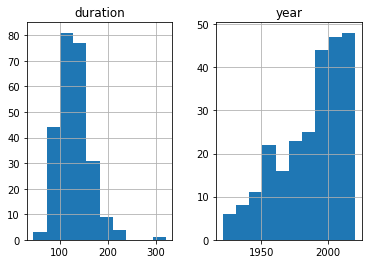

In [23]:
all_movies_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12d90a0d0>,
      dtype=object)

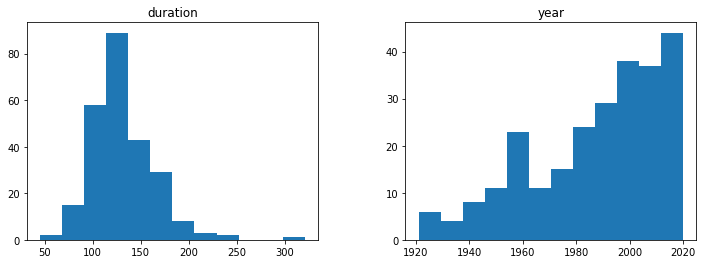

In [26]:
all_movies_df.hist(grid=False, bins=12, figsize=(12, 4))